In [ ]:
## Exploratory Data Analysis (EDA): BTC vs S&P 500

This notebook serves as the foundation of our project by performing Exploratory Data Analysis (EDA) on historical financial data.
We aim to understand the general behavior, structure, and volatility of Bitcoin (BTC) and the S&P 500 index between 2020 and 2024.

Through data cleaning, transformation, and visualization, we:
- Prepare the raw price data for further analysis,
- Calculate and visualize daily returns,
- Highlight early trends and volatility differences between the two markets.

The insights derived here will inform and guide the statistical tests performed in the **hypothesis testing notebook**.


In [7]:
## Downloading Data from Yahoo Finance

##We use the `yfinance` library to download historical daily price data for Bitcoin (BTC-USD) and the S&P 500 index (^GSPC) between 2020 and 2024.
##The data is saved locally as CSV files for further analysis.

!pip install yfinance > /dev/null

import yfinance as yf

# Bitcoin
btc = yf.download('BTC-USD', start='2020-01-01', end='2024-01-01')
btc.to_csv('btc.csv')

# S&P 500
sp500 = yf.download('^GSPC', start='2020-01-01', end='2024-01-01')
sp500.to_csv('sp500.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
## Data Preprocessing and Price Visualization

#In this section, we load the saved CSV files, convert the closing price columns to numeric format, handle missing values,
#and visualize the daily closing prices of Bitcoin and the S&P 500 between 2020 and 2024.


from google.colab import files


files.download('btc.csv')
files.download('sp500.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

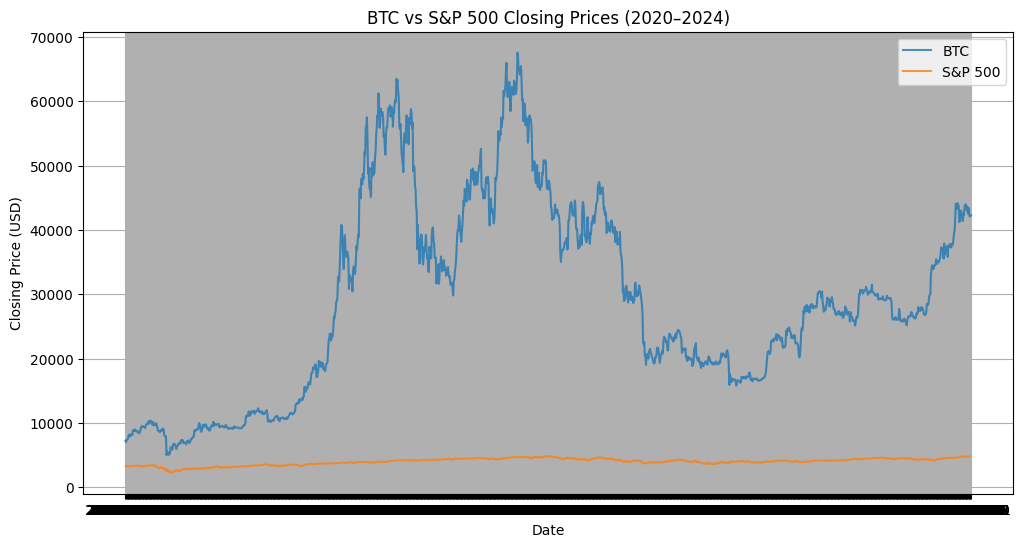

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# Load data from CSV files
btc = pd.read_csv('btc.csv', index_col=0, parse_dates=True)
sp500 = pd.read_csv('sp500.csv', index_col=0, parse_dates=True)

# Convert closing prices to numeric format (in case of any parsing issues)
btc['Close'] = pd.to_numeric(btc['Close'], errors='coerce')
sp500['Close'] = pd.to_numeric(sp500['Close'], errors='coerce')

# Drop rows with missing closing prices
btc.dropna(subset=['Close'], inplace=True)
sp500.dropna(subset=['Close'], inplace=True)

# Plot closing prices
plt.figure(figsize=(12,6))
plt.plot(btc['Close'], label='BTC', alpha=0.8)
plt.plot(sp500['Close'], label='S&P 500', alpha=0.8)
plt.title('BTC vs S&P 500 Closing Prices (2020–2024)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
## Daily Return Calculation and Visualization

#Here, we compute the daily returns for both BTC and S&P 500 using the percentage change method.
#Then, we visualize these returns to observe their volatility and behavior over time.

# Calculate daily returns using percentage change
btc['Return'] = btc['Close'].pct_change()
sp500['Return'] = sp500['Close'].pct_change()


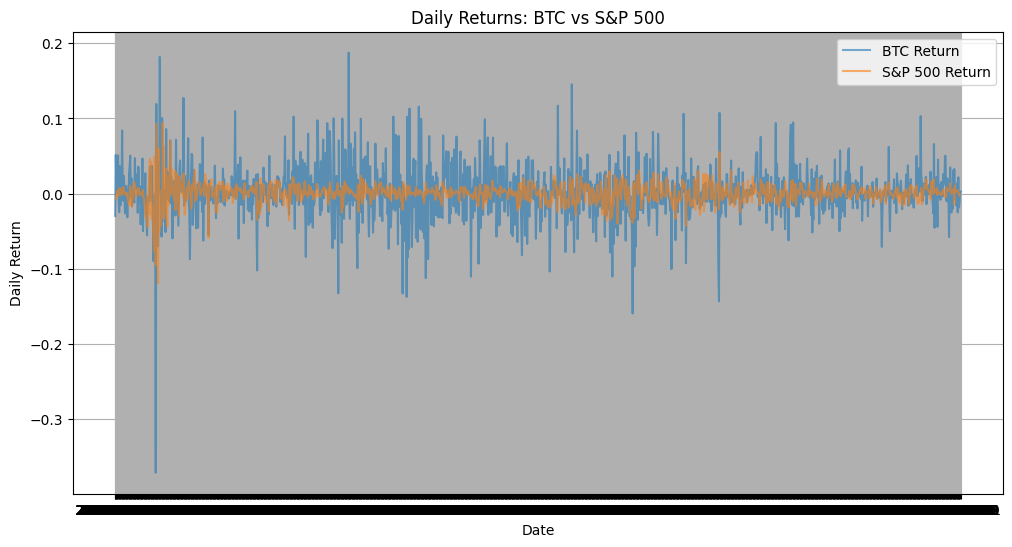

In [ ]:
# Plot daily returns
plt.figure(figsize=(12,6))
plt.plot(btc['Return'], label='BTC Return', alpha=0.6)
plt.plot(sp500['Return'], label='S&P 500 Return', alpha=0.6)
plt.title('Daily Returns: BTC vs S&P 500')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
## Summary & Transition to Hypothesis Testing

In this notebook, we explored the historical daily price trends of Bitcoin (BTC) and the S&P 500 index between 2020 and 2024.
We performed essential preprocessing steps such as handling missing values, converting data types, and computing daily returns.

Key insights from this phase:
- BTC and S&P 500 closing prices show differing trends and volatility profiles.
- Daily returns of BTC display significantly more variability compared to the S&P 500.
- These preliminary visualizations suggest structural differences between digital and traditional markets.

These findings provide a strong foundation for the **hypothesis testing notebook**, where we formally assess:
- The strength and significance of correlation between BTC and S&P 500 returns,
- Differences in volatility patterns,
- And the implications of these differences for market behavior and investment strategies.
